100%|██████████| 42974/42974 [00:00<00:00, 2127951.69it/s]


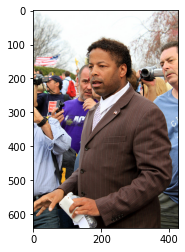

In [40]:
import numpy as np
import json
import cv2
import matplotlib.pyplot as plt
import random
from tqdm import tqdm


def show_skeleton(img,kpts,color=(255,128,128),thr=0.1):
    kpts = np.array(kpts).reshape(-1,3)
    skelenton = [[0, 2], [1, 3], [2, 4], [3, 5], [6, 8], [8, 10], [7, 9], [9, 11], [12, 13], [0, 13], [1, 13],
                 [6,13],[7, 13]]
    points_num = [num for num in range(14)]
    for sk in skelenton:

        pos1 = (int(kpts[sk[0], 0]), int(kpts[sk[0], 1]))
        pos2 = (int(kpts[sk[1], 0]), int(kpts[sk[1] , 1]))
        if pos1[0] > 0 and pos1[1] > 0 and pos2[0] > 0 and pos2[1] > 0 and kpts[sk[0], 2] > thr and kpts[
            sk[1], 2] > thr:
            cv2.line(img, pos1, pos2, color, 2, 8)
    for points in points_num:
        pos = (int(kpts[points,0]),int(kpts[points,1]))
        v = kpts[points,2]
        if pos[0] > 0 and pos[1] > 0 and v > thr:
            cv2.circle(img, pos,4,(0,0,255) if v == 1 else (0,255,0),-1)  # 为肢体点画红色实心圆
    return img


with open("/home/chen/workshop/thesis/human-pose-estimation.pytorch/data/crowdpose/annotations/crowdpose_train.json","r") as load_f:
    load_dict = json.load(load_f)

images=load_dict['images']
annotations=load_dict['annotations']

ids = set([i['id'] for i in images])
id=random.randint(min(ids), max(ids))
image = cv2.imread("/home/chen/workshop/thesis/human-pose-estimation.pytorch/data/crowdpose/images/" + str(id)+'.jpg')
# for img in tqdm(images):
#     if img['file_name'] == '100002.jpg':
#         print(img['id'])

joints=list()
skeleton_color = [(154, 194, 182), (123,151,138),(0,208,244),(8,131,229),(18,87,220)]
for person in tqdm(annotations):
    if person['image_id'] == id:
        color=random.choice(skeleton_color)
        show_skeleton(image, person['keypoints'], color=color)

plt.imshow(image[:,:,[2,1,0]])
